# **Bagging and Boosting Comparison on Diabetes Dataset**

## **Project Overview**
### **Objective**
- Compare the performance of ensemble methods: **BaggingClassifier** and **AdaBoostClassifier**.
- Understand their strengths and weaknesses using the **Diabetes Dataset**.

### **Skills Demonstrated**
- Implementation of Bagging and Boosting algorithms.
- Evaluation and comparison of model performance.

### **Learnings**
- Insights into the working of bagging (variance reduction) and boosting (bias reduction).
- Strengths and weaknesses of each approach in handling imbalanced datasets.

In [1]:
# **Import Libraries**
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

1. Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

- It decreases the variance and helps to avoid overfitting.
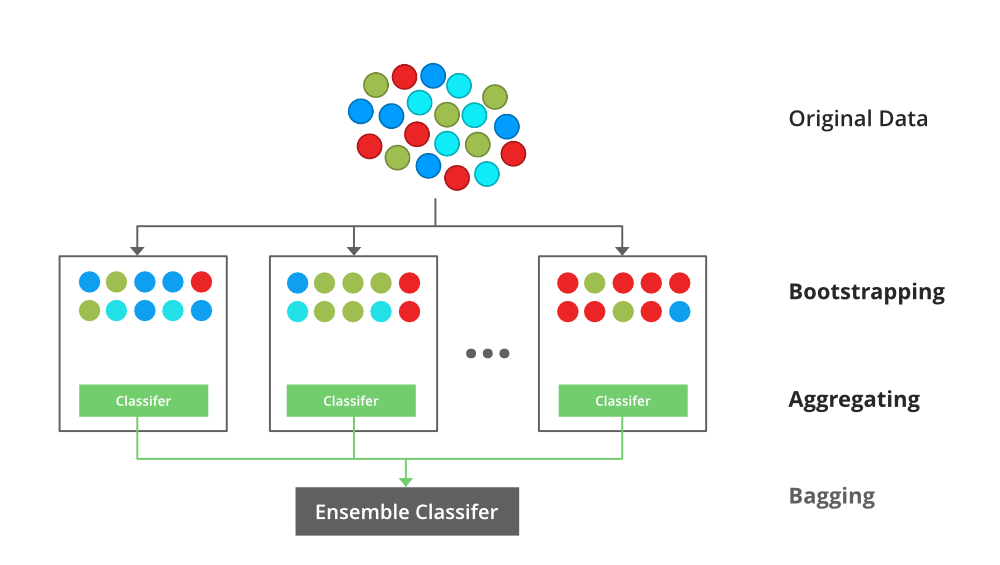

eg. Random Forest

2. Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

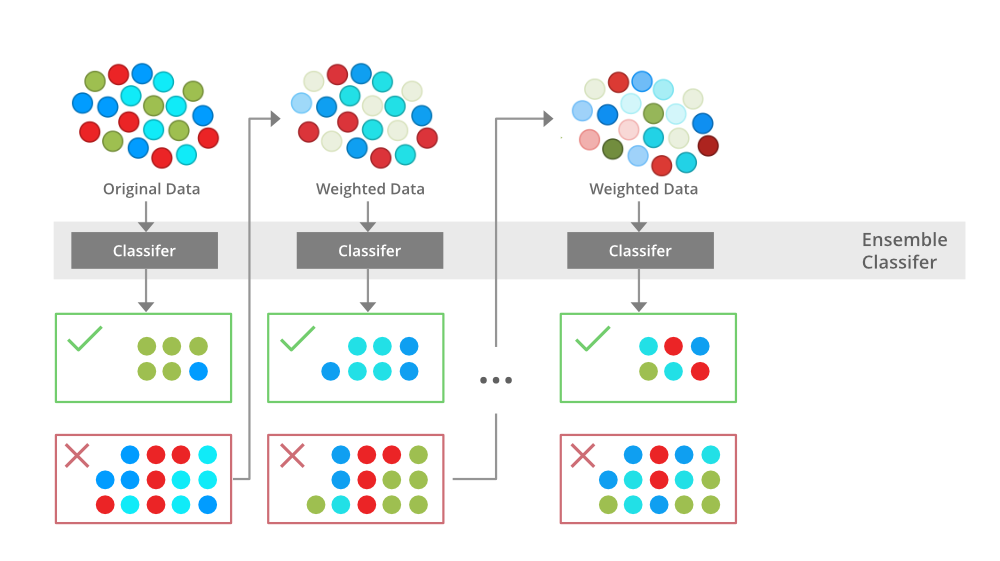

Implementation Steps of Bagging

Aim to decrease variance, not bias.

- Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
- Step 2: A base model is created on each of these subsets.
- Step 3: Each model is learned in parallel with each training set and independent of each other.
- Step 4: The final predictions are determined by combining the predictions from all the models.

Steps for Boosting

Aim to decrease bias, not variance.

1. Initialise the dataset and assign equal weight to each of the data point.

2. Provide this as input to the model and identify the wrongly classified data points.

3. Increase the weight of the wrongly classified data points and decrease the weights of correctly classified data points. And then normalize the weights of all data points.

4. if (got required results)
  Goto step 5
else
  Goto step 2

5. End

In [2]:
# **Load Dataset**
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [3]:
# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Implementation**
- We use `BaggingClassifier` with `DecisionTreeClassifier` as the base estimator.

In [8]:
# Bagging Classifier
bagging_model = BaggingClassifier(

    n_estimators=50,
    random_state=42
)

In [9]:
  # Train the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [10]:
# Predictions
y_pred_bagging = bagging_model.predict(X_test)

In [11]:
# Evaluation
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[77 22]
 [17 38]]


In [13]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(

    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

In [14]:
# Train the model
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluation
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))

AdaBoost Classifier Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Confusion Matrix:
 [[88 11]
 [23 32]]


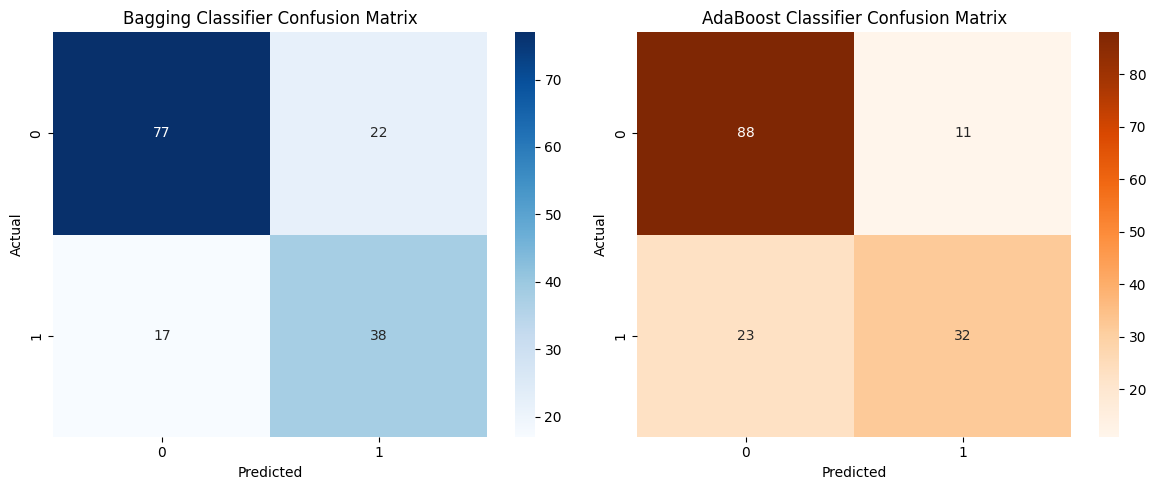

In [15]:
# **4. Visualizing Confusion Matrices**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Bagging
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Bagging Classifier Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for AdaBoost
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('AdaBoost Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### **Comparison of Bagging and AdaBoost Classifiers**

| Metric          | Bagging Classifier | AdaBoost Classifier |
|------------------|--------------------|---------------------|
| **Accuracy**     | 74.68%            | 77.92%             |
| **Precision (Class 0)** | 82%                | 79%                |
| **Precision (Class 1)** | 63%                | 74%                |
| **Recall (Class 0)**    | 78%                | 89%                |
| **Recall (Class 1)**    | 69%                | 58%                |
| **F1-Score (Class 0)**  | 80%                | 84%                |
| **F1-Score (Class 1)**  | 66%                | 65%                |

---

### **Key Business Insights**
1. **Overall Performance**:
   - AdaBoost outperforms Bagging in accuracy (**77.92% vs. 74.68%**), indicating better overall prediction capabilities.

2. **Non-Diabetic Cases (Class 0)**:
   - AdaBoost provides higher recall (**89%**) compared to Bagging (**78%**), making it more reliable for identifying non-diabetic patients.
   - The precision and F1-score for Class 0 are also slightly better for AdaBoost.

3. **Diabetic Cases (Class 1)**:
   - Bagging achieves higher recall (**69% vs. 58%**) for diabetic cases, making it better at identifying actual diabetic patients.
   - AdaBoost has better precision (**74% vs. 63%**) for diabetic predictions, reducing false positives.

4. **Model Selection**:
   - **Choose AdaBoost** if minimizing false positives and overall accuracy are priorities.
   - **Choose Bagging** if capturing diabetic cases (true positives) is more critical for the business objective.

---

### **Recommendation**
For a healthcare context:
- If the focus is on reducing missed diabetic diagnoses (false negatives), Bagging is preferable.
- For higher general accuracy and balanced predictions, AdaBoost is the better choice.
